<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week5/WOA7015_Wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 5
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


## Now we do a simple SVM model training

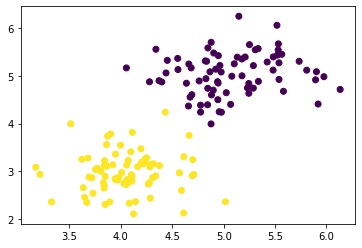

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.40)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [166]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


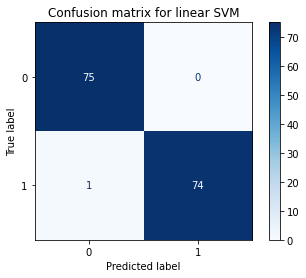

In [170]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X, y,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [171]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9933333333333333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


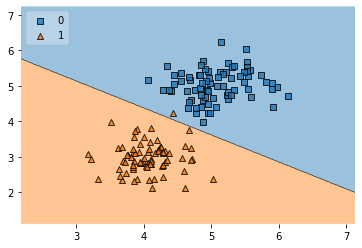

In [172]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

### How do we know if the model is good to predict future data? 
We split the data into training and testing data. 

Testing data serves as a future data. 

In [175]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  30
no of testing data:  120


In [179]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy}')
print(f'Model testing accuracy: {test_accuracy}')

Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667


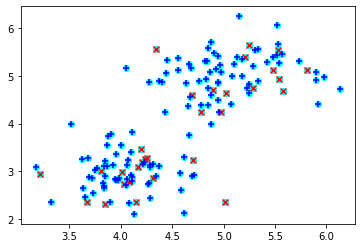

In [190]:
# check where is the testing and training data
plt.scatter(X[:, 0], X[:, 1], c='cyan')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='red')
plt.scatter(X_test[:, 0], X_test[:, 1], marker = '+', c='blue')


# To check if the model is really robust. 
# We can do cross validation.

Cross validation is we seperate data into k-fold. Here, we demostrate 5-fold. <br> 
**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_2*. <br>

**At third iteration**, 
*   Use the first 1, 2, 4, 5 set of data for training (blue boxes) and 3rd set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_3*. <br>

Repeat till 5th iteration, we will have 5 validation accuracy. Average accuracy can be computed to evaluate the model performance. 










In [200]:
# To check if the model is really robust. 
# We do cross validation 

train_acc = []
test_acc = []
for n in range(5):
  # Split into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
  print('Experiment ', n)
  print('no of training data: ', len(X_train))
  print('no of testing data: ', len(X_test))

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_test = svm.predict(X_test)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)
  print(f'Model training accuracy: {train_accuracy}')
  print(f'Model testing accuracy: {test_accuracy}')
  train_acc.append(train_accuracy)
  test_acc.append(test_accuracy)
  print('---------------------------------------------')

print(f'Average Training accuracy: {np.average(train_acc):.4f} +- {np.std(train_acc):.4f}')
print(f'Average Testing accuracy: {np.average(test_acc):.4f} +- {np.std(test_acc):.4f}')

Experiment  0
no of training data:  30
no of testing data:  120
Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667
---------------------------------------------
Experiment  1
no of training data:  30
no of testing data:  120
Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667
---------------------------------------------
Experiment  2
no of training data:  30
no of testing data:  120
Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667
---------------------------------------------
Experiment  3
no of training data:  30
no of testing data:  120
Model training accuracy: 1.0
Model testing accuracy: 1.0
---------------------------------------------
Experiment  4
no of training data:  30
no of testing data:  120
Model training accuracy: 1.0
Model testing accuracy: 0.9916666666666667
---------------------------------------------
Average Training accuracy: 1.0000 +- 0.0000
Average Testing accuracy: 0.9933 +- 0.0033


In [ ]:
# A more robust way is to use cross validation 

## What if our data is cannot seperate by linear kernel

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [56]:
# Configuration options
num_samples_total = 2500
gaussian_mean = (2,3)
num_classes_total = 2
num_features_total = 2

In [36]:
# Generate data
X, y = make_gaussian_quantiles(n_features=num_features_total, n_classes=num_classes_total, n_samples=num_samples_total, mean=gaussian_mean)


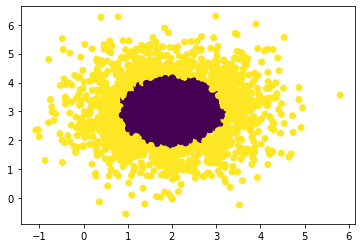

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [62]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  1250
no of testing data:  1250


In [109]:
# Create the SVM
svm = SVC(C=0.01, gamma=0.1, random_state=42, kernel='rbf')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

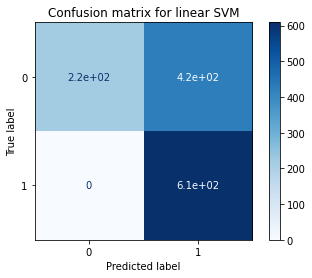

In [110]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [111]:
# Generate predictions
y_pred = svm.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.6608


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


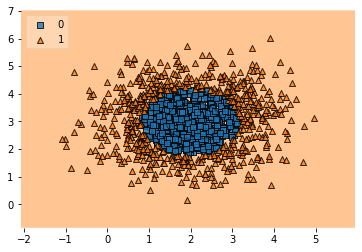

In [112]:
# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.show()

## Your task (10%): Train a SVM model to best classify breast cancer data.

Steps:
1. Load data 
2. 2% - split data into 80% train, 20% test 
3. 2% - train your svm model using only the train data. 
4. 4% - Try at least 10 different hyperparameter, obtain the validation accuracies. 
5. 2% - Which SVM model is the best? State your answer and why?. I.e SVM model with rbf kernel of C=1.0, gamma=0.1 because ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the breast cancer dataset
bc = datasets.load_breast_cancer()
df = pd.DataFrame(data=bc.data)
df["label"] = bc.target

In [ ]:
# Scatter plot shown in fig 1
plt.scatter(df[0][df["label"] == 0], df[1][df["label"] == 0], 
            color='red', marker='o', label='malignant')
plt.scatter(df[0][df["label"] == 1], df[1][df["label"] == 1], 
            color='green', marker='*', label='benign')
plt.xlabel('Malignant')
plt.ylabel('Benign')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# your code here #